# Package Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

# Data Import

In [2]:
df = pd.read_csv("Sommerhus22/Sommerhus22_data.csv", sep=";")

## Datasortering/Forberedelse

In [3]:
amo = len(df)


def counter(arr,count_check):
    """
    En funktion der tæller hvor mange gange et bestemt element (count_check) 
    forekommer i et array (arr).
    """
    count_amo = 0
    for i in range(len(arr)):
        if arr[i] == count_check:
            count_amo += 1
    
    return count_amo


def melding_format(df):
    """
    Returnerer et array som sorterer meldingerne ind i to arrays:
    En som indholder meldingen, og en som indeholder udfaldet af meldingen.

    Fx hvis man i første indgang har "9g" og i den anden "-2", betyder det man har meldt
    9 gode, og efterfølgende tabte med 2 stik.

    OBS: Ved hhv Sol og Ren sol indikerer 0.1 og -0.1 (numerisk værdi valgt af praktiske årsager) 
    om spilleren med den givne melding enten vandt eller tabte runden.
    
    """

    arr = df["Melding"]

    mel1 = np.zeros_like(arr)
    mel2 = np.zeros_like(arr)

    count = 0

    for melding in arr:
        mel_split = melding.split(",")

        mel1[count] = mel_split[0]

        if len(mel_split) > 1:
            if mel_split[1][-1] == "o":
                mel2[count] = int(mel_split[1][-2])
            elif mel_split[1][-1] == "u":
                mel2[count] = -int(mel_split[1][-2])
        
        elif mel1[count] == "Sol" or mel1[count] == "Rsol":
            if (df.iloc[count][1:] > 0).sum() == 3:
                mel2[count] = -0.1
            else:
                mel2[count] = 0.1

        count += 1

    return {'Melding': mel1, 'Resultat': mel2}


Laver en dictionary-template som indeholder alle spillere.

In [4]:
dict_temp = {}
for person in df:
    if person!="Melding":
        dict_temp[person] = 0


Arrays der indeholder antal spil spillet pr person:

In [5]:
game_amo_pp = dict_temp.copy()

for person in game_amo_pp:
    game_amo_pp[person] = amo - counter(df[person],0)

game_amo_pp


{'David': 74,
 'William': 61,
 'Sofus': 11,
 'Gustav': 79,
 'Johan': 48,
 'Samuel': 53,
 'Maria': 9}

Dictionaries der kun indeholder spil som hver enkelte person har deltaget i

In [6]:
gamedata_clean = dict_temp.copy()

for person in gamedata_clean:
    gamedata_clean[person] = df[person].loc[df[person]!=0]

# Statisikker

### Winning Streaks

In [7]:
def win_str_count(df):
    """
    En funktion der tæller hvor mange antal spil en given person har vundet i træk
    """

    max_win = 0
    count = 0

    for game_score in df:
        if game_score > 0:
            count += 1
        else:
            max_win = max(max_win,count)
            count = 0
    
    max_win = max(max_win,count)

    return max_win

Højeste winningstreak taget forbehold pauser mellem spil (dvs forekommer der spil hvor man ikke har deltaget, så resettes streaken)

In [8]:
dict_winstr_nop = dict_temp.copy()

for person in dict_winstr_nop:
    dict_winstr_nop[person] = win_str_count(df[person])

dict_winstr_nop

{'David': 7,
 'William': 9,
 'Sofus': 2,
 'Gustav': 5,
 'Johan': 4,
 'Samuel': 3,
 'Maria': 1}

Højeste winningstreak uden forbehold for pauser mellem spil (Nu ignorerers pauser mellem spil, dvs hvis man vinder et spil, sider over et par spil, og så vinder næste gang man spiller igen, så fortsætter streaken).

In [9]:
dict_winstr_incp = dict_temp.copy()

for person in dict_winstr_incp:
    dict_winstr_incp[person] = win_str_count(gamedata_clean[person])

dict_winstr_incp

{'David': 7,
 'William': 9,
 'Sofus': 2,
 'Gustav': 5,
 'Johan': 4,
 'Samuel': 3,
 'Maria': 2}

### Statistikker over Point

In [10]:
avg = dict_temp.copy()
medians = dict_temp.copy()
stds = dict_temp.copy()
mins = dict_temp.copy()
maxs = dict_temp.copy()

for person in gamedata_clean:
    medians[person] = np.median(gamedata_clean[person])
    avg[person] = np.average(gamedata_clean[person])
    stds[person] = np.std(gamedata_clean[person])
    mins[person] = np.min(gamedata_clean[person])
    maxs[person] = np.max(gamedata_clean[person])

Gennemsnitscore

In [11]:
avg

{'David': 0.11851351351351354,
 'William': -0.11999999999999997,
 'Sofus': 0.08181818181818185,
 'Gustav': 0.003797468354430369,
 'Johan': 0.04541666666666669,
 'Samuel': -0.10754716981132076,
 'Maria': 0.13}

Medianscore

In [12]:
medians

{'David': 0.15000000000000002,
 'William': -0.1,
 'Sofus': -0.1,
 'Gustav': 0.2,
 'Johan': 0.2,
 'Samuel': -0.2,
 'Maria': -0.1}

Spredning af point

In [13]:
stds

{'David': 0.9405614804285969,
 'William': 1.0632844259612775,
 'Sofus': 0.6965084112501074,
 'Gustav': 0.9635355567427261,
 'Johan': 0.9873089653475023,
 'Samuel': 0.9252942533714228,
 'Maria': 0.6901529621113794}

Laveste score

In [14]:
mins

{'David': -1.6,
 'William': -3.0,
 'Sofus': -1.0,
 'Gustav': -3.2,
 'Johan': -3.2,
 'Samuel': -2.4,
 'Maria': -0.8}

Højeste score

In [15]:
maxs

{'David': 3.2,
 'William': 3.2,
 'Sofus': 1.0,
 'Gustav': 2.4,
 'Johan': 2.4,
 'Samuel': 2.7,
 'Maria': 1.2}

Boxplots

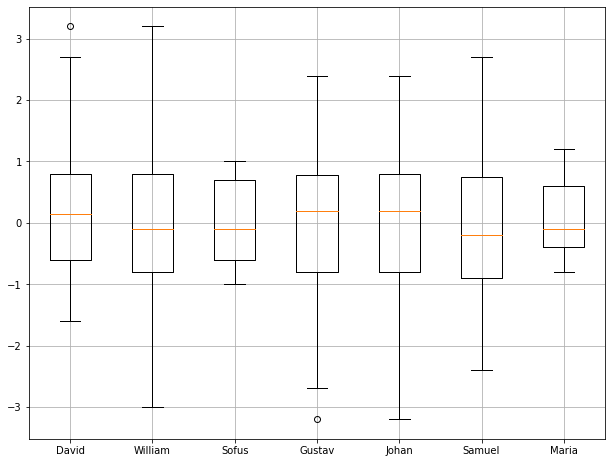

In [16]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
ax.boxplot(gamedata_clean.values())
ax.set_xticklabels(gamedata_clean.keys())
plt.grid()
plt.show()

Antal vundne spil pr person

In [17]:
wins_tot = dict_temp.copy()
loss_tot = dict_temp.copy()
wins_tot_rel  = dict_temp.copy()

for person in wins_tot:
    wins_tot[person] = (gamedata_clean[person] > 0).sum()
    loss_tot[person] = (gamedata_clean[person] < 0).sum()
    wins_tot_rel[person] = wins_tot[person]/game_amo_pp[person]

wins_tot

{'David': 38,
 'William': 29,
 'Sofus': 5,
 'Gustav': 44,
 'Johan': 28,
 'Samuel': 24,
 'Maria': 4}

Antal tabte spil pr person

In [18]:
loss_tot

{'David': 36,
 'William': 32,
 'Sofus': 6,
 'Gustav': 35,
 'Johan': 20,
 'Samuel': 29,
 'Maria': 5}

Antal vundne spil relativ til samlet antal spil pr person

In [19]:
wins_tot_rel

{'David': 0.5135135135135135,
 'William': 0.47540983606557374,
 'Sofus': 0.45454545454545453,
 'Gustav': 0.5569620253164557,
 'Johan': 0.5833333333333334,
 'Samuel': 0.4528301886792453,
 'Maria': 0.4444444444444444}

### Statistikker over meldinger

In [20]:
meldinger = melding_format(df)

Antal forekomster af hver melding:

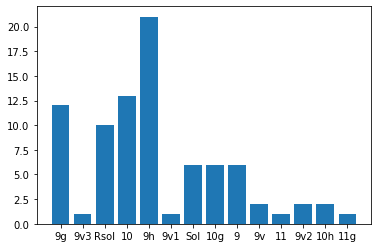

In [21]:
meldinger_count = collections.Counter(meldinger["Melding"])

plt.bar(*zip(*meldinger_count.items()))
plt.show()

Antal vundne spil, hvor man har fået flere stik end meldt

In [22]:
wins_op = dict_temp.copy()

count = 0
for udfald in meldinger["Resultat"]:
    if udfald > 0.1:
        for person in wins_op:
            if df.iloc[count][person] > 0:
                wins_op[person] += 1

    count += 1

wins_op

{'David': 20,
 'William': 11,
 'Sofus': 0,
 'Gustav': 16,
 'Johan': 7,
 'Samuel': 11,
 'Maria': 1}

Antal vundne spil, hvor man har fået flere stik end meldt, relativt til hvor mange spil man har spillet i alt

In [23]:
wins_op_rel = dict_temp.copy()

for person in wins_op_rel:
    wins_op_rel[person] = wins_op[person]/game_amo_pp[person]

wins_op_rel

{'David': 0.2702702702702703,
 'William': 0.18032786885245902,
 'Sofus': 0.0,
 'Gustav': 0.20253164556962025,
 'Johan': 0.14583333333333334,
 'Samuel': 0.20754716981132076,
 'Maria': 0.1111111111111111}

## Par-statistikker

Først laves en template dictionary som indeholder makkerparkombinationer

In [24]:
pairs_temp = {}

for p1 in dict_temp:
    for p2 in dict_temp:
        pairs_temp[p1,p2] = 0

### Samlede antal spil

Antal spil som hver personkombination har deltaget i sammen (dvs inkl som både makker og modstander)

In [25]:
game_amo_pairs = pairs_temp.copy()

for i in range(amo):
    for p1 in dict_temp:
        for p2 in dict_temp:
            if df.iloc[i][p1] != 0 and df.iloc[i][p2] != 0:
                game_amo_pairs[p1,p2] += 1


game_amo_pairs_df = pd.DataFrame(game_amo_pairs.values(), index=pd.MultiIndex.from_tuples(game_amo_pairs.keys())).unstack(1)
game_amo_pairs_df

0                                        
        David Gustav Johan Maria Samuel Sofus William
David      74     70    42     5     43    11      51
Gustav     70     79    44     8     48    10      57
Johan      42     44    48     0     27     0      30
Maria       5      8     0     9      5     5       4
Samuel     43     48    27     5     53     1      34
Sofus      11     10     0     5      1    11       6
William    51     57    30     4     34     6      61

Antal spil spillet i hver makkerparkombination, incl sol og ren sol

In [26]:
wins_amo_pairs = pairs_temp.copy()

for i in range(amo):
    for p1 in dict_temp:
        for p2 in dict_temp:
            if df.iloc[i][p1] > 0 and df.iloc[i][p2] > 0:
                wins_amo_pairs[p1,p2] += 1
            elif df.iloc[i][p1] < 0 and df.iloc[i][p2] < 0:
                wins_amo_pairs[p1,p2] += 1


wins_amo_pairs_df = pd.DataFrame(wins_amo_pairs.values(), index=pd.MultiIndex.from_tuples(wins_amo_pairs.keys())).unstack(1)
wins_amo_pairs_df

0                                        
        David Gustav Johan Maria Samuel Sofus William
David      74     17    16     3     14     5      24
Gustav     17     79    22     3     18     3      19
Johan      16     22    48     0     10     0      12
Maria       3      3     0     9      3     2       0
Samuel     14     18    10     3     53     0      14
Sofus       5      3     0     2      0    11       2
William    24     19    12     0     14     2      61

Antal spil spillet i hver makkerparkombination, eskl sol og ren sol

In [27]:
wins_amo_pairs_nosol = pairs_temp.copy()

for i in range(amo):
    if df.iloc[i]["Melding"] != "Sol" and df.iloc[i]["Melding"] != "Rsol":
        for p1 in dict_temp:
            for p2 in dict_temp:
                if df.iloc[i][p1] > 0 and df.iloc[i][p2] > 0:
                    wins_amo_pairs_nosol[p1,p2] += 1
                elif df.iloc[i][p1] < 0 and df.iloc[i][p2] < 0:
                    wins_amo_pairs_nosol[p1,p2] += 1
                    

wins_amo_pairs_nosol_df = pd.DataFrame(wins_amo_pairs_nosol.values(), index=pd.MultiIndex.from_tuples(wins_amo_pairs_nosol.keys())).unstack(1)
wins_amo_pairs_nosol_df

0                                        
        David Gustav Johan Maria Samuel Sofus William
David      59     16    11     2     10     3      19
Gustav     16     64    17     3     13     3      14
Johan      11     17    39     0      6     0       8
Maria       2      3     0     8      3     1       0
Samuel     10     13     6     3     41     0       9
Sofus       3      3     0     1      0     9       1
William    19     14     8     0      9     1      51

Antal spil spillet i hver makkerparkombination, incl sol og ren sol, korrigeret (divideret) med antal spil parret har deltaget i sammen. Dvs man får hvor ofte (i procent) to spillere har været makre over alle de spil som begge personer har deltaget i.

In [28]:
wins_amo_pairs_corr = pairs_temp.copy()

for i in range(amo):
    for p1 in dict_temp:
        for p2 in dict_temp:
            if df.iloc[i][p1] > 0 and df.iloc[i][p2] > 0:
                wins_amo_pairs_corr[p1,p2] += 1
            elif df.iloc[i][p1] < 0 and df.iloc[i][p2] < 0:
                wins_amo_pairs_corr[p1,p2] += 1


for p1 in dict_temp:
    for p2 in dict_temp:
        if game_amo_pairs[p1,p2] != 0:
            wins_amo_pairs_corr[p1,p2] /= game_amo_pairs[p1,p2]

wins_amo_pairs_corr_df = pd.DataFrame(wins_amo_pairs_corr.values(), index=pd.MultiIndex.from_tuples(wins_amo_pairs_corr.keys())).unstack(1)
wins_amo_pairs_corr_df

0                                                         
            David    Gustav     Johan  Maria    Samuel     Sofus   William
David    1.000000  0.242857  0.380952  0.600  0.325581  0.454545  0.470588
Gustav   0.242857  1.000000  0.500000  0.375  0.375000  0.300000  0.333333
Johan    0.380952  0.500000  1.000000  0.000  0.370370  0.000000  0.400000
Maria    0.600000  0.375000  0.000000  1.000  0.600000  0.400000  0.000000
Samuel   0.325581  0.375000  0.370370  0.600  1.000000  0.000000  0.411765
Sofus    0.454545  0.300000  0.000000  0.400  0.000000  1.000000  0.333333
William  0.470588  0.333333  0.400000  0.000  0.411765  0.333333  1.000000

### Antal vundne spil

Antal vundne spil pr makkerpar

# Idéer til statistikker

Statistik pr personn:
- Højeste winning streak
- Medianscore
- Hyppigste melding pr person
- Hvem vandt relativt flest spil, hvor de fik flere stik end meldt
- Antal spil spillet
- Antal/procent spil tabt/vundet

Statistik pr makkerpar:
- Den bedste kombination af makkerpar ifht antal vundene spil, pointscore
- Den mest hyppige kombi af makkerpar (påvis/debunk the Gutsab-Scmulduo)
